# Avocado Price Forecasts

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from fbprophet import Prophet
import plotly.plotly as ply
import plotly.graph_objs as go

In [23]:
#Loading all the csv files
df = pd.read_csv("avocado.csv")

In [24]:
df1=df.drop(['Unnamed: 0'],axis=1)

In [25]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [26]:
df1['Date']=pd.to_datetime(df1['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [28]:
df1.set_index('Date')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany


### Atlantic Season 2017

In [42]:
df_data_2017.reset_index(inplace=True)

In [57]:
df_data=df_data_2017[df_data_2017.Date >'2016-12-31' ]
df_data=df_data[df_data.Date <  '2018-01-01']
# df_data.set_index('Date')

In [105]:
df_new=df_data.resample('W').mean()

Text(0.5,1,'Total Volume vs Average Price during Atlantic Season , 2017')

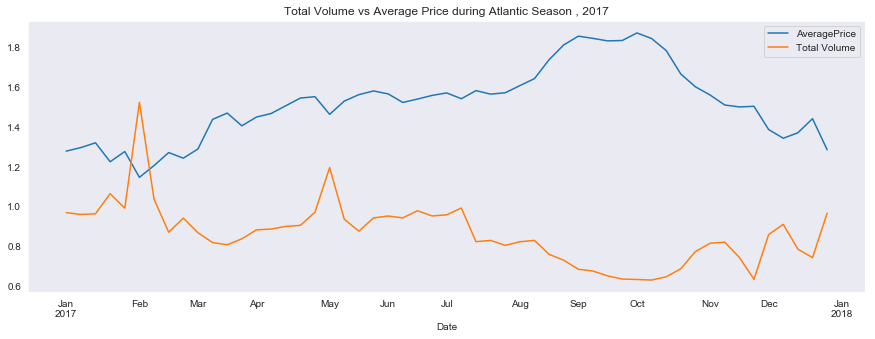

In [111]:
sns.set_style("dark", {"xtick.major.size": 8, "ytick.major.size": 8})

plt.figure(figsize=(15,5))
df_new['AveragePrice'].plot()
(df_new['Total Volume']/1000000).plot()
plt.legend()
plt.title('Total Volume vs Average Price during Atlantic Season , 2017')

* Here important thing to note is the average price of Avocadoes started shooting up from June till November and there was significant decrease in total volume of avocadoes available in the market.
* The Atlantic hurricane season officially began on June 1, 2017.Among the busiest on record, the season produced 18 tropical depressions, all but one of which further intensified into tropical storms.
* 10 hurricanes occurred in succession, the greatest number of consecutive hurricanes since the start of the satellite era in 1966.
* Six of the ten hurricanes further strengthened into major hurricanes

### Conventional vs Organic Avocadoes:

In [112]:
df1['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

C:\Users\Shreyansh\New folder\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

C:\Users\Shreyansh\New folder\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.



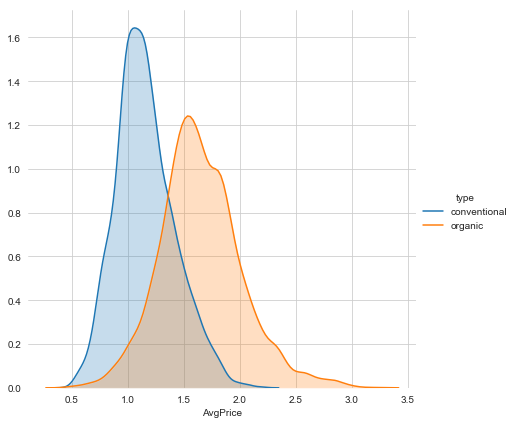

In [113]:
sns.set_style('whitegrid')
g=sns.FacetGrid(df1,hue='type',size=6)
g.map(sns.kdeplot,'AveragePrice',shade=True)
g.add_legend()
plt.xlabel('AvgPrice')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

In [114]:
#Function for selecting region and type
def reg(r,t):
    dfs = df1[(df1.region ==r) & (df1.type == t) ]
    dfs1=dfs.set_index('Date')
    return dfs1   

All the analysis that follows is for the region and type selected in the below cell.

Enter below the Region and Type of the Avocado:

In [115]:
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime
df2=reg('TotalUS','conventional')  #<<<<-------------Enter the region and type here----------------->>>>


# Distribution of Avg Price over time :

In [116]:
trace = go.Scatter(
    x = df2.index,
    y = df2.AveragePrice,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data,filename='basicscatter')

# Average Price Distribution : 

C:\Users\Shreyansh\New folder\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

C:\Users\Shreyansh\New folder\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.



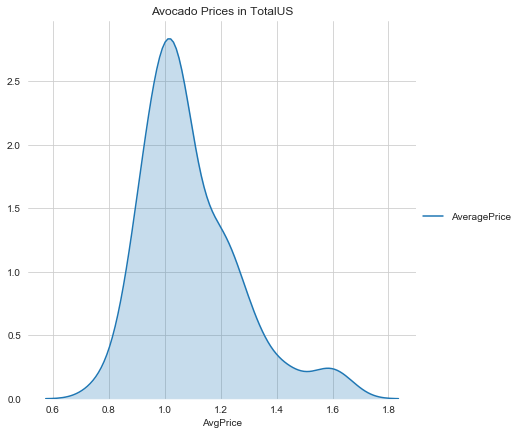

In [117]:
sns.set_style('whitegrid')
g=sns.FacetGrid(df2,size=6)
g.map(sns.kdeplot,'AveragePrice',shade=True)
g.add_legend()
plt.xlabel('AvgPrice')
plt.title('Avocado Prices in '+ df2.region[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

### Forecasting the future prices of Avocado (Using FBPROPHET)

In [118]:
df2.reset_index(inplace=True) #Removing the datetime index

In [119]:
date_price = df2.rename(columns={'Date':'ds', 'AveragePrice':'y'})
date_price.head()

,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
1,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
3,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
4,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS


Fitting the model Using Prophet: 

In [120]:
m = Prophet()
m.fit(date_price)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Shreyansh\New folder\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



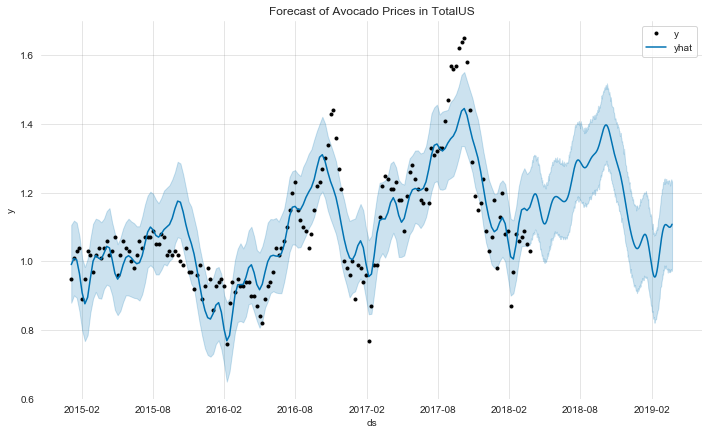

In [121]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.legend()
plt.title('Forecast of Avocado Prices in '+ df2.region[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

In [122]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.106552,0.879913,1.106361,1.106552,1.106552,-0.115575,-0.115575,-0.115575,-0.115575,-0.115575,-0.115575,0.0,0.0,0.0,0.990977
1,2015-01-11,1.102778,0.901242,1.118862,1.102778,1.102778,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,0.0,0.0,0.0,1.008706
2,2015-01-18,1.099005,0.894546,1.112919,1.099005,1.099005,-0.094345,-0.094345,-0.094345,-0.094345,-0.094345,-0.094345,0.0,0.0,0.0,1.004660
3,2015-01-25,1.095231,0.854945,1.074247,1.095231,1.095231,-0.130109,-0.130109,-0.130109,-0.130109,-0.130109,-0.130109,0.0,0.0,0.0,0.965122
4,2015-02-01,1.091457,0.799906,1.008605,1.091457,1.091457,-0.182542,-0.182542,-0.182542,-0.182542,-0.182542,-0.182542,0.0,0.0,0.0,0.908915
5,2015-02-08,1.087684,0.768199,0.983731,1.087684,1.087684,-0.210780,-0.210780,-0.210780,-0.210780,-0.210780,-0.210780,0.0,0.0,0.0,0.876904
6,2015-02-15,1.083910,0.785710,1.007595,1.083910,1.083910,-0.188347,-0.188347,-0.188347,-0.188347,-0.188347,-0.188347,0.0,0.0,0.0,0.895563
7,2015-02-22,1.080137,0.850999,1.065029,1.080137,1.080137,-0.129344,-0.129344,-0.129344,-0.129344,-0.129344,-0.129344,0.0,0.0,0.0,0.950792
8,2015-03-01,1.076363,0.891652,1.109795,1.076363,1.076363,-0.075241,-0.075241,-0.075241,-0.075241,-0.075241,-0.075241,0.0,0.0,0.0,1.001122
9,2015-03-08,1.072589,0.911574,1.124411,1.072589,1.072589,-0.054755,-0.054755,-0.054755,-0.054755,-0.054755,-0.054755,0.0,0.0,0.0,1.017834


In [123]:
# from sklearn.metrics import r2_score
# error = mean_squared_error(date_price['y'],forecast['yhat']) #To calculate the MSE remove period=365 to period=0 in above cell
# print('Test MSE: %.3f' % error)

In the above figure 'yhat' is the forecasted Avocado Prices in the year 2019

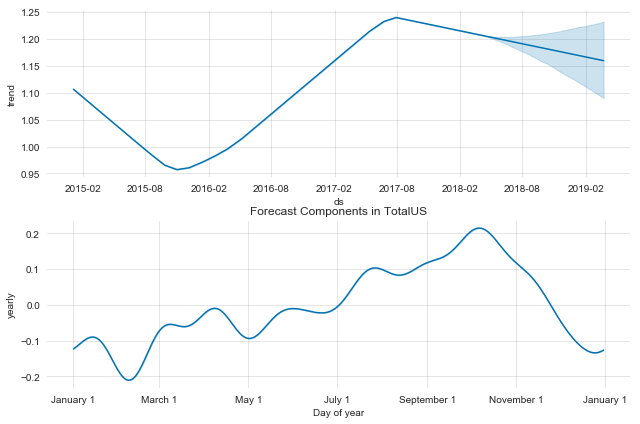

In [124]:
fig2 = m.plot_components(forecast)
plt.title('Forecast Components in '+ df2.region[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

# Using ARIMA to forecast the Prices:

In [125]:
df2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
1,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
3,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
4,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS


Remove all other rows as we only need Date and AveragePrice

In [126]:
df3=df2.drop(['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region'],axis=1)
df3.head()

,Date,AveragePrice
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


In [127]:
df3.set_index('Date',inplace=True)

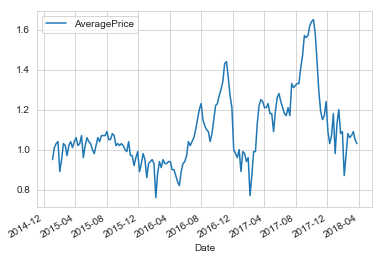

In [128]:
df3.plot()


C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.

C:\Users\Shreyansh\New folder\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.



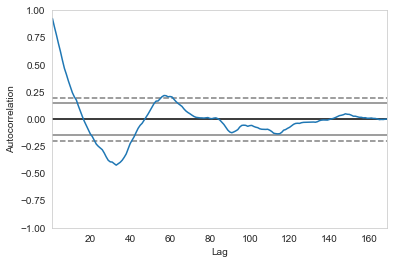

In [129]:
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
autocorrelation_plot(df3)
plt.show()

C:\Users\Shreyansh\New folder\lib\site-packages\scipy\signal\signaltools.py:1333: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Shreyansh\New folder\lib\site-packages\scipy\signal\signaltools.py:1336: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Shreyansh\New folder\lib\site-packages\scipy\signal\signaltools.py:1342: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

                             ARIMA Model Results                              
Dep. Variable:         D.AveragePrice   No. Observations:                  168
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 217.668
Method:                       css-mle   S.D. of innovations              0.066
Date:                Tue, 06 Nov 2018   AIC                           -421.337
Time:                        14:27:40   BIC                           -399.469
Sample:                    12-20-2015   HQIC                          -412.462
                         - 01-07-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0011      0.005      0.198      0.843      -0.010       0.012
ar.L1.D.AveragePrice     0.0287      0.077      0.371      0.711      -0.123       0.180
ar.L2.D.Aver

C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



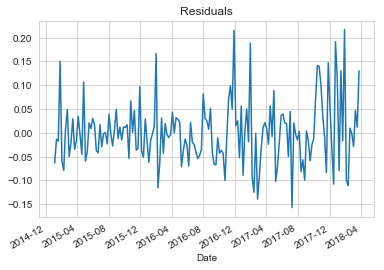

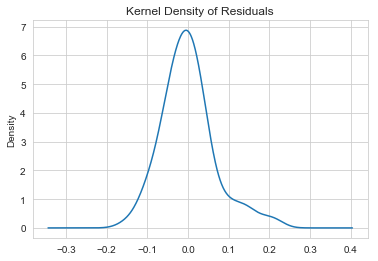

count    168.000000
mean       0.000006
std        0.066429
min       -0.157380
25%       -0.040868
50%       -0.003824
75%        0.029482
max        0.216820
dtype: float64


In [130]:
model = ARIMA(df3, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = (model_fit.resid)
residuals.plot()
plt.title('Residuals')
plt.show()
residuals.plot(kind='kde')
plt.title('Kernel Density of Residuals')
plt.show()
print(residuals.describe())

Above analysis shows that the error is still in the model(residuals) and KDE plot shows that most of them are centered near to Zero

In [131]:
from sklearn.metrics import mean_squared_error
X = df3.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)



C:\Users\Shreyansh\New folder\lib\site-packages\scipy\signal\signaltools.py:1333: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Shreyansh\New folder\lib\site-packages\scipy\signal\signaltools.py:1336: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Shreyansh\New folder\lib\site-packages\scipy\signal\signaltools.py:1342: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(s

predicted=1.148735, expected=1.150000
predicted=1.184011, expected=1.190000
predicted=1.207098, expected=1.290000
predicted=1.270111, expected=1.440000
predicted=1.433947, expected=1.580000
predicted=1.593563, expected=1.650000
predicted=1.674395, expected=1.640000
predicted=1.662573, expected=1.620000
predicted=1.638715, expected=1.570000
predicted=1.567983, expected=1.560000
predicted=1.563628, expected=1.570000
predicted=1.572895, expected=1.470000
predicted=1.454571, expected=1.410000
predicted=1.420235, expected=1.330000
predicted=1.320077, expected=1.330000
predicted=1.326872, expected=1.320000
predicted=1.313047, expected=1.310000
predicted=1.306685, expected=1.330000
predicted=1.339610, expected=1.170000
predicted=1.144179, expected=1.210000
predicted=1.234253, expected=1.170000
predicted=1.153325, expected=1.180000
predicted=1.172156, expected=1.210000
predicted=1.216304, expected=1.240000
predicted=1.239172, expected=1.280000
predicted=1.287830, expected=1.260000
predicted=1.

Calculating R-square :

In [132]:
from sklearn.metrics import r2_score
print(r2_score(test,predictions))

0.835124755888351


In [38]:
#predictions 


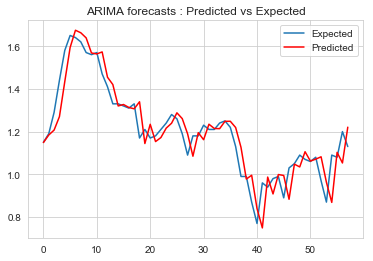

In [133]:
plt.plot(test,label='Expected')
plt.plot(predictions, color='red',label='Predicted')
# plt.plot(forecast['yhat'],label='fbprophet')
plt.title('ARIMA forecasts : Predicted vs Expected')
plt.legend()
plt.show()

References : Kaggle, Dataquest and MachineLearningMastery.com